## Data Description:
●	id - booking ID

●	user_id - the ID of the customer (based on mobile number)

●	vehicle_model_id - vehicle model type.

●	package_id - type of package (1=4hrs & 40kms, 2=8hrs & 80kms, 3=6hrs & 60kms, 4= 10hrs & 100kms, 5=5hrs & 50kms, 6=3hrs & 30kms, 7=12hrs & 120kms)

●	travel_type_id - type of travel (1=long distance, 2= point to point, 3= hourly rental).

●	from_area_id - unique identifier of area. Applicable only for point-to-point travel and packages

●	to_area_id - unique identifier of area. Applicable only for point-to-point travel

●	from_city_id - unique identifier of city

●	to_city_id - unique identifier of the city (only for intercity)

●	from_date - timestamp of the requested trip start

●	to_date - timestamp of the trip end

●	online_booking - if the booking was done on the desktop website

●	mobile_site_booking - if the booking was done on mobile website

●	booking_created - time stamp of booking

●	from_lat - latitude of from area

●	from_long -  longitude of from  area

●	to_lat - latitude of to area

●	to_long - longitude of to area

●	car_cancellation - whether the booking was canceled (1) or not (0) due to unavailability of a car.


In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#importing data set
df= pd.read_csv('data.csv')

In [3]:
df.head()

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
0,132512,22177,28,NaN,2,83.0,448.0,NaN,NaN,1/1/2013 2:00,NaN,0,0,1/1/2013 1:39,12.924150,77.672290,12.927320,77.635750,0
1,132513,21413,12,NaN,2,1010.0,540.0,NaN,NaN,1/1/2013 9:00,NaN,0,0,1/1/2013 2:25,12.966910,77.749350,12.927680,77.626640,0
2,132514,22178,12,NaN,2,1301.0,1034.0,NaN,NaN,1/1/2013 3:30,NaN,0,0,1/1/2013 3:08,12.937222,77.626915,13.047926,77.597766,0
3,132515,13034,12,NaN,2,768.0,398.0,NaN,NaN,1/1/2013 5:45,NaN,0,0,1/1/2013 4:39,12.989990,77.553320,12.971430,77.639140,0
4,132517,22180,12,NaN,2,1365.0,849.0,NaN,NaN,1/1/2013 9:00,NaN,0,0,1/1/2013 7:53,12.845653,77.677925,12.954340,77.600720,0


In [5]:
df.shape

(43431, 19)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43431 entries, 0 to 43430
Data columns (total 19 columns):
id                     43431 non-null int64
user_id                43431 non-null int64
vehicle_model_id       43431 non-null int64
package_id             7550 non-null float64
travel_type_id         43431 non-null int64
from_area_id           43343 non-null float64
to_area_id             34293 non-null float64
from_city_id           16345 non-null float64
to_city_id             1588 non-null float64
from_date              43431 non-null object
to_date                25541 non-null object
online_booking         43431 non-null int64
mobile_site_booking    43431 non-null int64
booking_created        43431 non-null object
from_lat               43338 non-null float64
from_long              43338 non-null float64
to_lat                 34293 non-null float64
to_long                34293 non-null float64
Car_Cancellation       43431 non-null int64
dtypes: float64(9), int64(7), object

In [7]:
df.describe()

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,online_booking,mobile_site_booking,from_lat,from_long,to_lat,to_long,Car_Cancellation
count,43431.000000,43431.000000,43431.00000,7550.000000,43431.000000,43343.000000,34293.000000,16345.000000,1588.000000,43431.000000,43431.000000,43338.000000,43338.000000,34293.000000,34293.000000,43431.000000
mean,159206.473556,30739.198153,25.71723,2.030066,2.137252,714.544494,669.490917,14.915081,68.537783,0.351592,0.043241,12.982461,77.636255,13.026648,77.640595,0.072114
std,15442.386279,10996.476709,26.79825,1.461756,0.437712,419.883553,400.638225,1.165306,49.880732,0.477473,0.203402,0.085933,0.059391,0.113487,0.064045,0.258680
min,132512.000000,16.000000,1.00000,1.000000,1.000000,2.000000,2.000000,1.000000,4.000000,0.000000,0.000000,12.776630,77.386930,12.776630,77.386930,0.000000
25%,145778.000000,24614.000000,12.00000,1.000000,2.000000,393.000000,393.000000,15.000000,32.000000,0.000000,0.000000,12.926450,77.593661,12.951850,77.582030,0.000000
50%,159248.000000,31627.000000,12.00000,2.000000,2.000000,590.000000,541.000000,15.000000,49.000000,0.000000,0.000000,12.968887,77.635750,12.982750,77.645030,0.000000
75%,172578.500000,39167.000000,24.00000,2.000000,2.000000,1089.000000,1054.000000,15.000000,108.000000,1.000000,0.000000,13.007750,77.688900,13.199560,77.706880,0.000000
max,185941.000000,48730.000000,91.00000,7.000000,3.000000,1403.000000,1403.000000,31.000000,203.000000,1.000000,1.000000,13.366072,77.786420,13.366072,77.786420,1.000000


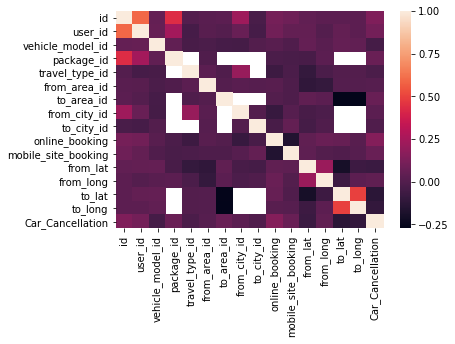

In [83]:
sns.heatmap(df.corr())

In [23]:
df['travel_type_id'].count()

43431

In [24]:
df['travel_type_id'].nunique()

3

In [25]:
df['travel_type_id'].unique()

array([2, 1, 3], dtype=int64)

In [8]:
df['from_area_id'].count()

43343

In [13]:
df['from_area_id'].nunique()

598

In [14]:
df['from_area_id'].unique()

array([  83., 1010., 1301.,  768., 1365., 1021.,  571., 1192.,  448.,
        516.,  150.,  455., 1166.,  793., 1063., 1102.,  814., 1383.,
       1353.,  297.,  471.,   58.,  540., 1286.,  515.,  142.,  393.,
         89., 1237.,   61.,  137.,  409., 1062., 1371., 1323., 1017.,
        168., 1373.,  373.,  413.,  974., 1374.,  271., 1136., 1033.,
        145., 1384.,  105.,  112., 1037., 1040.,  949., 1330.,   87.,
       1032.,  217.,  344.,  590., 1086., 1053., 1223.,  963., 1041.,
        585., 1322.,  293.,  339., 1194.,  353., 1068.,    6.,  601.,
        479., 1084.,  776., 1186.,  253., 1378., 1054.,  466.,  458.,
        149.,  167.,  352.,  625.,  849.,  392., 1095.,  463., 1244.,
        691.,  484.,  692.,  156., 1083., 1096.,  572.,  767.,  136.,
       1155.,  410.,  157.,  689.,  824.,  450., 1085., 1388., 1199.,
        197.,  151.,   25.,  541., 1183., 1391., 1015., 1153.,  238.,
       1058., 1118.,  667., 1191., 1230.,  912., 1214.,  376.,  499.,
        559.,  542.,

In [16]:
df['from_area_id'].value_counts()

393.0     3858
571.0     1631
293.0     1052
585.0      911
1010.0     768
142.0      727
83.0       719
1384.0     628
1096.0     542
58.0       466
269.0      413
1026.0     395
625.0      370
1017.0     363
1330.0     362
689.0      341
768.0      334
271.0      333
1056.0     330
1371.0     327
1068.0     324
363.0      308
396.0      289
1021.0     279
1365.0     273
105.0      271
410.0      266
458.0      261
515.0      251
776.0      249
          ... 
1209.0       1
1277.0       1
1042.0       1
178.0        1
1158.0       1
1343.0       1
1164.0       1
483.0        1
802.0        1
1113.0       1
1215.0       1
1127.0       1
72.0         1
1253.0       1
384.0        1
770.0        1
1092.0       1
185.0        1
79.0         1
215.0        1
1235.0       1
68.0         1
138.0        1
369.0        1
1252.0       1
1178.0       1
1265.0       1
1345.0       1
1094.0       1
133.0        1
Name: from_area_id, Length: 598, dtype: int64

In [17]:
df['from_area_id'].value_counts().idxmax()

393.0

In [38]:
df['from_area_id'].isnull().count()

43431

In [40]:
#df['from_area_id'].dropna()

In [41]:
#sns.distplot(df['from_area_id']).astype(int) 
# there are few missing values

In [18]:
# Area code 393.0 has highest no of bookings

In [19]:
df['to_area_id'].nunique()


568

In [20]:
df['to_area_id'].value_counts()

393.0     8777
585.0     2339
1384.0    1237
571.0      664
293.0      555
1010.0     480
83.0       365
168.0      338
1371.0     332
452.0      330
142.0      326
1026.0     319
1068.0     313
572.0      310
1021.0     276
392.0      270
1192.0     234
1017.0     227
58.0       220
1096.0     217
768.0      200
271.0      195
136.0      187
1393.0     185
1330.0     180
625.0      179
455.0      172
269.0      166
1056.0     164
767.0      162
          ... 
1196.0       1
1302.0       1
133.0        1
1266.0       1
1042.0       1
301.0        1
174.0        1
1290.0       1
262.0        1
833.0        1
1369.0       1
17.0         1
428.0        1
1113.0       1
1118.0       1
1252.0       1
902.0        1
326.0        1
201.0        1
1356.0       1
1233.0       1
1201.0       1
215.0        1
1360.0       1
1124.0       1
1110.0       1
1207.0       1
644.0        1
1368.0       1
1127.0       1
Name: to_area_id, Length: 568, dtype: int64

In [21]:
df['to_area_id'].value_counts().idxmax()

393.0

In [22]:
# highest no of made from 393.0  (i.e 3858 bookings)

# highest no of bookings are made to go area 393.0 (i.e 8777 bookings)


In [31]:
df['from_date'].shape
#from_date      43431 non-null object

(43431,)

In [42]:
#missing values in to_area
sum(df.to_area_id.isnull().values.ravel())

9138

In [43]:
#missing values in to_area
sum(df.from_area_id.isnull().values.ravel())

88

In [44]:
sum(df.from_date.isnull().values.ravel())


0

In [51]:
df['vehicle_model_id'].value_counts()

12    31859
85     2407
89     2391
65     1912
28     1702
24     1494
87      565
90      312
23      297
86      123
10      104
64       85
54       73
17       40
91       25
30       14
36        9
13        7
43        2
72        2
1         2
75        1
76        1
39        1
70        1
69        1
14        1
Name: vehicle_model_id, dtype: int64

In [50]:
# NO of users
df['user_id'].value_counts()


29648    471
868      245
27458    211
32527    202
34972    198
33002    187
29275    185
32023    125
30290    120
38538    105
40512    104
37192    102
20570     96
41512     95
20598     86
29184     84
17664     78
24042     75
23948     74
44489     71
41644     70
45500     65
33614     64
32599     63
33882     63
25286     62
23775     60
41670     59
28359     54
1256      51
        ... 
48324      1
42183      1
23768      1
29917      1
31932      1
27870      1
25823      1
40160      1
36066      1
34019      1
48356      1
29885      1
23736      1
46181      1
31900      1
44134      1
42087      1
31868      1
25727      1
48260      1
42119      1
29853      1
44198      1
27806      1
25759      1
38049      1
36002      1
48292      1
46245      1
8196       1
Name: user_id, Length: 22267, dtype: int64

In [48]:
#car cancellation
df['Car_Cancellation'].value_counts()
#Total bookings 43431 
# Accepted bookings 40299 92.7%
# cancelled bookings 3132 7.3%


0    40299
1     3132
Name: Car_Cancellation, dtype: int64

In [53]:
new_df =df[['user_id','from_area_id','to_area_id','from_date','Car_Cancellation']]

In [55]:
new_df.head()

,user_id,from_area_id,to_area_id,from_date,Car_Cancellation
0,22177,83.0,448.0,1/1/2013 2:00,0
1,21413,1010.0,540.0,1/1/2013 9:00,0
2,22178,1301.0,1034.0,1/1/2013 3:30,0
3,13034,768.0,398.0,1/1/2013 5:45,0
4,22180,1365.0,849.0,1/1/2013 9:00,0


In [70]:
new_df_1=new_df.dropna()

In [75]:
new_df_1.head()

,user_id,from_area_id,to_area_id,from_date,Car_Cancellation
0,22177,83.0,448.0,1/1/2013 2:00,0
1,21413,1010.0,540.0,1/1/2013 9:00,0
2,22178,1301.0,1034.0,1/1/2013 3:30,0
3,13034,768.0,398.0,1/1/2013 5:45,0
4,22180,1365.0,849.0,1/1/2013 9:00,0


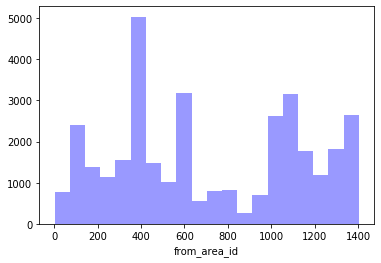

In [79]:
sns.distplot(new_df_1['from_area_id'], kde=False , bins=20, color='b')

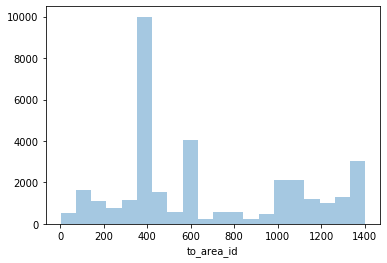

In [76]:
sns.distplot(new_df_1['to_area_id'], kde=False , bins=20)

In [77]:
new_df_1.corr()

,user_id,from_area_id,to_area_id,Car_Cancellation
user_id,1.000000,0.015147,0.008703,0.111034
from_area_id,0.015147,1.000000,0.007327,0.018134
to_area_id,0.008703,0.007327,1.000000,0.066088
Car_Cancellation,0.111034,0.018134,0.066088,1.000000


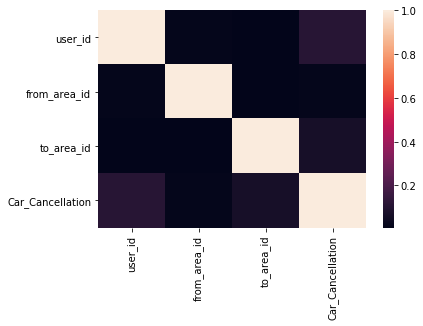

In [81]:
sns.heatmap(new_df_1.corr())

In [85]:
new_df_1['from_date'] = pd.to_datetime(new_df_1['from_date'])

In [86]:
new_df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34293 entries, 0 to 43430
Data columns (total 5 columns):
user_id             34293 non-null int64
from_area_id        34293 non-null float64
to_area_id          34293 non-null float64
from_date           34293 non-null datetime64[ns]
Car_Cancellation    34293 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 1.6 MB


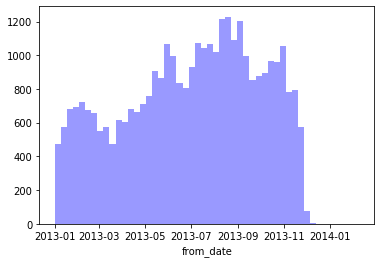

In [89]:
sns.distplot(new_df_1['from_date'], kde=False , bins=50, color='b')

Month Distribute: 1     2305
2     2354
3     2151
4     2439
5     3312
6     3411
7     4019
8     4417
9     3651
10    3734
11    2484
12      16
Name: from_date, dtype: int64


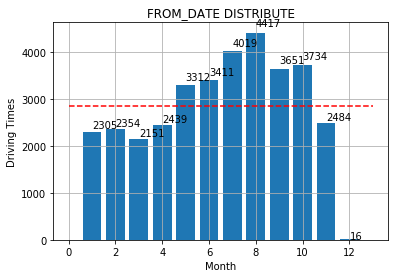

In [105]:
#Monthly Ride Distribution
new_df_1["from_date"]=pd.to_datetime(new_df_1["from_date"],format="%m/%d/%Y %H:%M")
sd_m_dis=new_df_1["from_date"].dt.month.value_counts()
sd_m_dis=sd_m_dis.sort_index()
sd_m_mean=sd_m_dis.mean()
print("Month Distribute:",sd_m_dis)
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x()+rect.get_width()/2., 1.03*height, '%s' % int(height))

rects=plt.bar(sd_m_dis.index,sd_m_dis.values)
plt.plot([0,len(sd_m_dis.index)+1],[sd_m_mean,sd_m_mean],"r--")
plt.title("FROM_DATE DISTRIBUTE")
plt.xlabel("Month")
plt.ylabel("Driving Times")
plt.grid()
autolabel(rects)
plt.savefig("./sd_m_dis_fig")

Hours Distribute: 0      500
1      348
2      463
3     1600
4     1783
5     1657
6     1526
7     1890
8     2267
9     2052
10    1417
11    1020
12    1236
13    1047
14    1021
15    1096
16    1615
17    2301
18    2178
19    1725
20    1611
21    1381
22    1389
23    1170
Name: from_date, dtype: int64


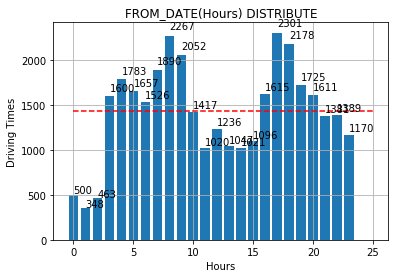

In [107]:
#Hourly Ride Distribution
sd_h_dis=new_df_1["from_date"].dt.hour.value_counts()
sd_h_dis=sd_h_dis.sort_index()
print("Hours Distribute:",sd_h_dis)
sd_h_mean=sd_h_dis.mean()

rects=plt.bar(sd_h_dis.index,sd_h_dis.values)
plt.plot([0,len(sd_h_dis.index)+1],[sd_h_mean,sd_h_mean],"r--")
plt.title("FROM_DATE(Hours) DISTRIBUTE")
plt.xlabel("Hours")
plt.ylabel("Driving Times")
plt.grid()
autolabel(rects)
plt.savefig("./sd_h_dis_fig")

# Complete Analysis of Trips

## Top 10 Areas from which bookings are made
Area-id  no-of-bookings
393.0     3858

571.0     1631

293.0     1052

585.0      911

1010.0     768

142.0      727

83.0       719

1384.0     628

1096.0     542

58.0       466

## Top 10 Areas(Destinations) to which bookings are made
Area-id  no-of-bookings
393.0     8777

585.0     2339

1384.0    1237

571.0      664

293.0      555

1010.0     480

83.0       365

168.0      338

1371.0     332

452.0      330

## Top 10 users who frequently use XRIDES 
User-id  No-of-Bookings

29648    471

868      245

27458    211

32527    202

34972    198

33002    187

29275    185

32023    125

30290    120

38538    105

40512    104

37192    102
## Total bookings 43431 
### Accepted bookings 40299 92.7%
### cancelled bookings 3132 7.3%

## Monthly Ride Bookings with peak months 7 and 8
Month  No-of-bookings
1     2305

2     2354

3     2151

4     2439

5     3312

6     3411

7     4019

8     4417

9     3651

10    3734

11    2484

12      16

## Hourly Ride bookings (Peak hours 8:00am,9:00am,5:00pm,6:00pm)
Hour  No-of-bookings
0      500

1      348

2      463

3     1600

4     1783

5     1657

6     1526

7     1890

8     2267

9     2052

10    1417

11    1020

12    1236

13    1047

14    1021

15    1096

16    1615

17    2301

18    2178

19    1725

20    1611

21    1381

22    1389

23    1170
